In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Different cost functions choosen from internet
def quadratic(x):
    return np.sum(np.square(x), axis=1)

def rastrigin(x):
    return 10 * len(x) + np.sum(np.square(x) - 10 * np.cos(2 * np.pi * x), axis=1)

def griewank(x):
    s = np.sum(np.square(x), axis=-1) / 4000
    p = np.prod(np.cos(x / np.sqrt(np.arange(1, x.shape[-1] + 1))), axis=-1)
    return 1 + s - p

def ackley(x):
    n = len(x)
    s1 = np.sum(np.square(x), axis=1)
    s2 = np.sum(np.cos(2 * np.pi * x), axis=1)
    return -20 * np.exp(-0.2 * np.sqrt(s1 / n)) - np.exp(s2 / n) + 20 + np.e

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
inp = np.stack([x,y],axis=1)

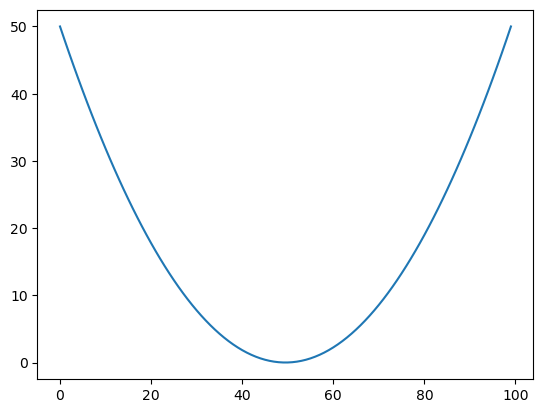

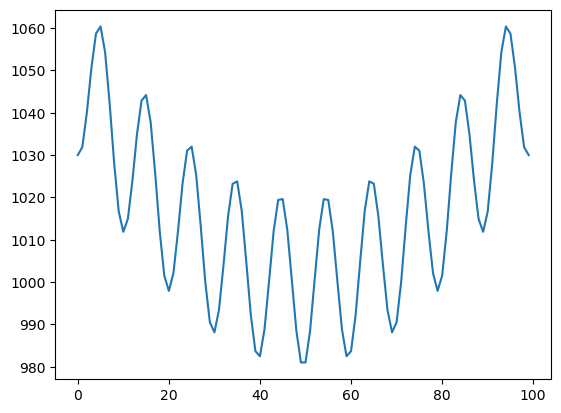

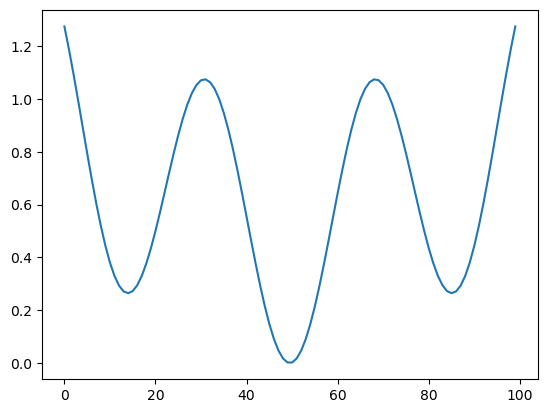

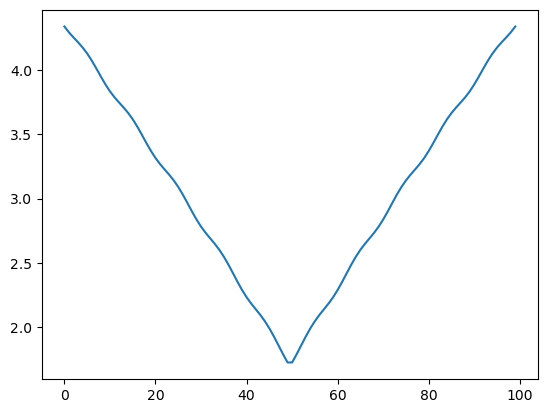

In [11]:
plt.plot(np.arange(100), quadratic(inp))
plt.show()
plt.plot(np.arange(100), rastrigin(inp))
plt.show()
plt.plot(np.arange(100), griewank(inp))
plt.show()
plt.plot(np.arange(100), ackley(inp))
plt.show()

In [108]:
# initialize particles - position, velocity, personal best, global best, cost
def initialize(n=10, dim=2,limit=[0,6]):
    particle_pos = np.random.uniform(limit[0], limit[1], (n,dim))
    particle_vel = np.zeros((n,dim))
    particle_best_pos = particle_pos.copy()
    particle_best_cost = np.full(n, np.inf)
    global_best_pos = None
    global_best_cost = np.zeros(dim)

    return particle_pos, particle_vel, particle_best_pos, particle_best_cost, global_best_cost

# Cost function
def cost(x,cost_fn):
    if cost_fn == 1:
        return quadratic(x)
    elif cost_fn == 2:
        return rastrigin(x)
    elif cost_fn == 3:
        return griewank(x)
    else:
        return ackley(x)

# Evaluate cost
def evaluate_cost(particle_pos, cost_fn):
    particle_cost = cost(particle_pos, cost_fn)
    return particle_cost

# Update personal best
def updatePersonalBest(curr_particle_pos, curr_particle_cost, particle_best_pos, particle_best_cost):
    best_cost_mask = curr_particle_cost < particle_best_cost # Minimum is better
    particle_best_pos[best_cost_mask] = curr_particle_pos[best_cost_mask]
    particle_best_cost[best_cost_mask] = curr_particle_cost[best_cost_mask]
    return particle_best_pos, particle_best_cost

# Update global best
def updateGlobalBest(particle_best_pos, particle_best_cost):
    best_mask = np.argmin(particle_best_cost)
    global_best_pos = particle_best_pos[best_mask]
    global_best_cost = particle_best_cost[best_mask]
    return global_best_pos, global_best_cost

# Update particle position
def updateParticle(curr_vel, curr_particle_pos, particle_best_pos, global_best_pos, limit=[0,6]):
    r1 = np.random.rand(1)
    r2 = np.random.rand(1)
    
    # Inertia factor
    w = 0.3
    
    # Cognitive and social factor
    c1, c2 = 2,2
    
    # Updating particle position with three components
    particle_vel = w * curr_vel + c1*r1*(particle_best_pos-curr_particle_pos) + c2*r2*(global_best_pos-curr_particle_pos)
    particle_pos = particle_vel + curr_particle_pos
    
    # If at all the position value explodes, clip it within the range
    particle_pos = np.clip(particle_pos, limit[0], limit[1])
    return particle_pos, particle_vel
    


In [109]:
# PSO algorithm

n = 20
dim = 2
limit = [-6,6]
cost_fn = 1

particle_pos, particle_vel, particle_best_pos, particle_best_cost, global_best_cost = initialize(n,dim,limit)
max_iter = 100
for i in range(max_iter):
    print(f'Iteration: {i+1}')
    particle_cost = evaluate_cost(particle_pos, cost_fn)
    
    # Update personal best
    particle_best_pos, particle_best_cost = updatePersonalBest(
        particle_pos, particle_cost, particle_best_pos, particle_best_cost)
    
    # Update Global best
    global_best_pos, global_best_cost = updateGlobalBest(particle_best_pos, particle_best_cost)
    
    # Update particle position
    particle_pos, particle_vel = updateParticle(particle_vel, particle_pos, particle_best_pos, global_best_pos, limit)
    print(f'Global best: {global_best_cost}')
    print(f'Personal best of all {n} particles:')
    print(particle_best_cost)
    print('------------------------------------------------')
    
    # Stopping criteria 
    if np.all(particle_best_cost <= 2):
        break
    
    

Iteration: 1
Global best: 0.029932190373842617
Personal best of all 20 particles:
[1.76606103e+01 5.54259018e+01 2.01382856e+01 6.12358070e-01
 5.81816289e+00 3.79185854e+01 3.72906278e+01 2.89608705e+01
 3.74283886e+01 3.86609542e+01 4.17157044e+01 4.85501332e+01
 8.80021375e+00 2.92671086e+01 2.51502522e+01 2.99321904e-02
 3.45450120e+01 2.21902433e+01 4.87036428e+01 3.31999501e+00]
------------------------------------------------
Iteration: 2
Global best: 0.029932190373842617
Personal best of all 20 particles:
[ 4.44092176 13.58602412  4.93268511  0.09682415  1.68556657  9.23708142
  9.02716799  7.06570022  9.19304915  9.57865769 10.31318823 11.82788349
  2.48991984  7.59815522  6.4548916   0.02993219  8.91032304  5.87589969
 11.95174492  0.7573075 ]
------------------------------------------------
Iteration: 3
Global best: 0.029932190373842617
Personal best of all 20 particles:
[2.43601766 8.17973717 3.02328453 0.09682415 0.41640058 5.72985096
 5.74683401 4.3717787  5.51009649 5.52

### Summary
- You can play around with 4 different cost functions
- For now, the cost functions are limited to 2 dimension
- You can play around by tweeking `w`, `c1`, `c2`
- The model runs as long as cost of all particles reduces less than 2 (some threshold)

### Observations
- Inertia factor (w)
    - When `w=0`, exploration is minimum. More influence is given to already found global best and personal best.
    - When `w=1`, exploration is maximium. Takes **comparatively** more time to converge
- Cognitive factor (c1) and social factor(c2)
    - When `c1=0` and `c2=2`. More preference is given to global best solution. It leads to quick convergence. Need not be the best solution.
    - When `c1=2` and `c1=0`. More preference is given to personal best solution. It leads to localised search. ideally no convergence
    